In [196]:
# Manipulação de Dados
# -----------------------
import numpy as np  # Cálculos numéricos e arrays.
import pandas as pd  # Manipulação de dados em tabelas (DataFrames).
import re  # Manipulação de expressões regulares para textos.
from nltk.corpus import stopwords  # Lista de palavras irrelevantes em NLP.

pd.set_option('display.max_columns', None)  # Exibe todas as colunas do DataFrame.

# -----------------------
# Visualização de Dados
# -----------------------
import matplotlib.pyplot as plt  # Criação de gráficos estáticos.
import seaborn as sns  # Gráficos estatísticos bonitos e informativos.
import plotly.express as px  # Gráficos interativos.
from wordcloud import WordCloud  # Geração de nuvens de palavras.

# -----------------------
# Configurações
# -----------------------
import warnings  # Gerencia mensagens de alerta.
warnings.filterwarnings("ignore")  # Ignora os avisos.


In [197]:
df = pd.read_csv('../arquivos/Tweets.csv')

In [198]:
#Primeiras cinco linhas
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [199]:
#Quantidades de linhas e colunas
df.shape

(14640, 15)

In [200]:
#Colunas
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [201]:
#informações do data Set, como tipo da coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [202]:
#Estatisticas sobre as colunas númericas
df.describe()

tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000

In [203]:
#Quantidades de Companhias aéreas
df['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [204]:
#Quantidades de lugares onde foram feitos os tweet
df['tweet_location'].value_counts()

tweet_location
Boston, MA              157
New York, NY            156
Washington, DC          150
New York                127
USA                     126
                       ... 
Seattle (duh!)            1
South ~O-H-I-O~ Side      1
Pocono Raceway            1
denver, co                1
Nigeria,lagos             1
Name: count, Length: 3081, dtype: int64

In [205]:
# Convertendo para datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date

# Obtendo o range de datas
data_min = df['tweet_created'].min()
data_max = df['tweet_created'].max()
date_range = pd.date_range(start=data_min, end=data_max)

# Exibindo os resultados
print(f"Data mínima: {data_min}")
print(f"Data máxima: {data_max}")
print(f"Intervalo de datas:\n{date_range}")

Data mínima: 2015-02-16
Data máxima: 2015-02-24
Intervalo de datas:
DatetimeIndex(['2015-02-16', '2015-02-17', '2015-02-18', '2015-02-19',
               '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23',
               '2015-02-24'],
              dtype='datetime64[ns]', freq='D')


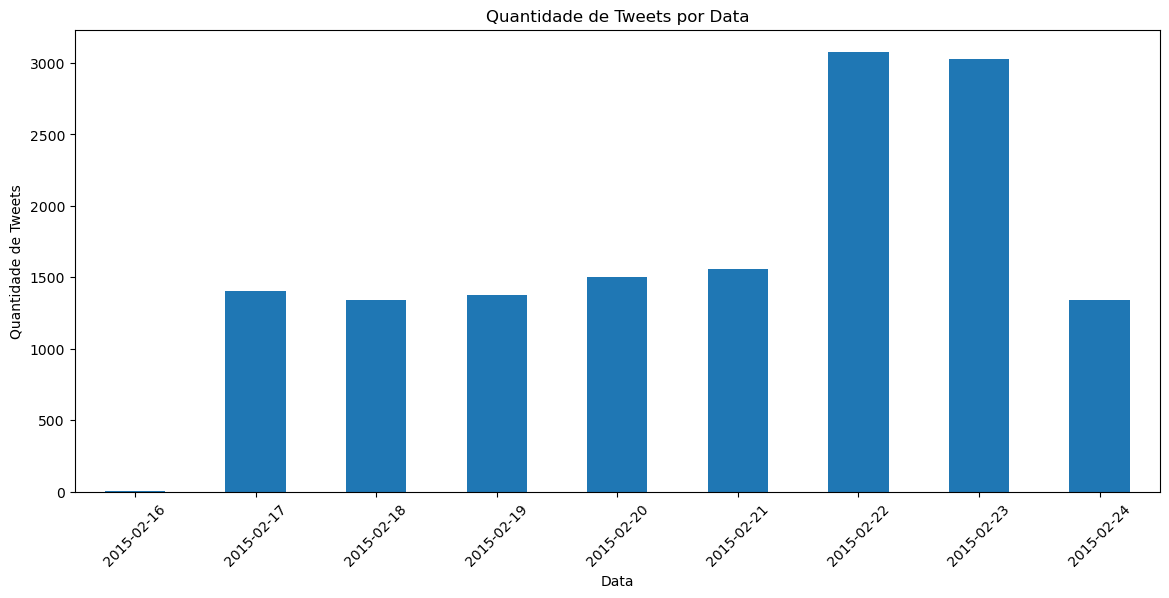

In [206]:
# Convertendo a coluna 'tweet_created' para datetime (se ainda não estiver no formato datetime)
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Agrupando os tweets por data e contando a quantidade de tweets por dia
tweets_por_data = df.groupby(df['tweet_created'].dt.date).size()

# Criando o gráfico de barras
tweets_por_data.plot(kind="bar", figsize=(14, 6), fontsize=10, rot=45, title="Quantidade de Tweets por Data")

# Ajustando os rótulos
plt.xlabel('Data', fontsize=10)
plt.ylabel('Quantidade de Tweets', fontsize=10)

# Exibindo o gráfico
plt.show()

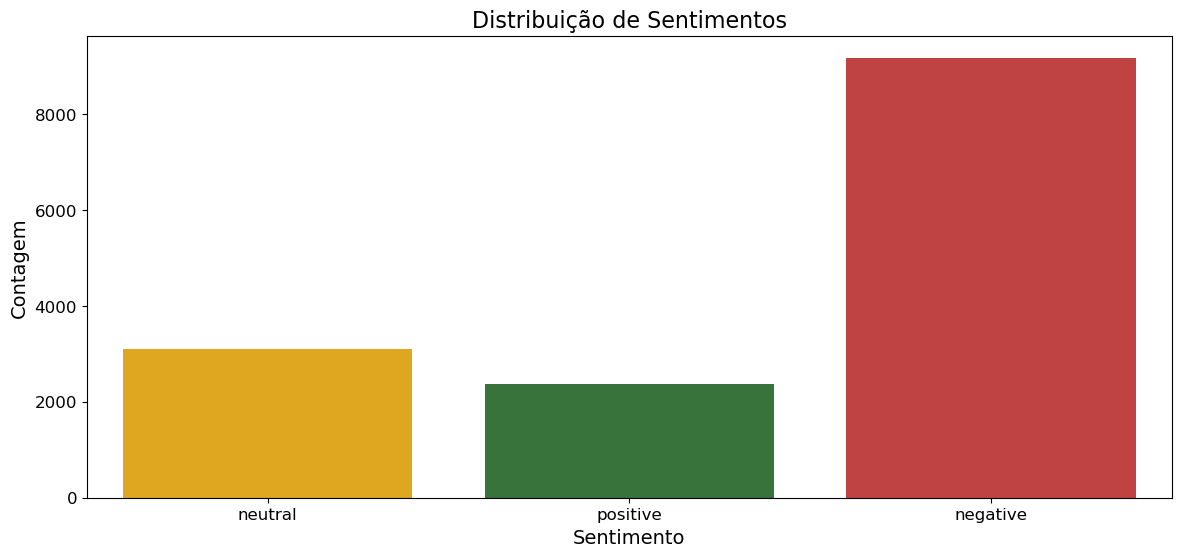

In [207]:
# Definindo as cores personalizadas
custom_colors = {"positive": "#2e7d32", "neutral": "#ffb300", "negative": "#d32f2f"}

# Criando o gráfico de barras
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df, 
    x="airline_sentiment", 
    palette=custom_colors
)

# Ajustando o layout
plt.title("Distribuição de Sentimentos", fontsize=16, loc='center')
plt.xlabel("Sentimento", fontsize=14)
plt.ylabel("Contagem", fontsize=14)
plt.grid(False)  # Remove a grade
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('white')  # Fundo branco

# Exibindo o gráfico
plt.show()

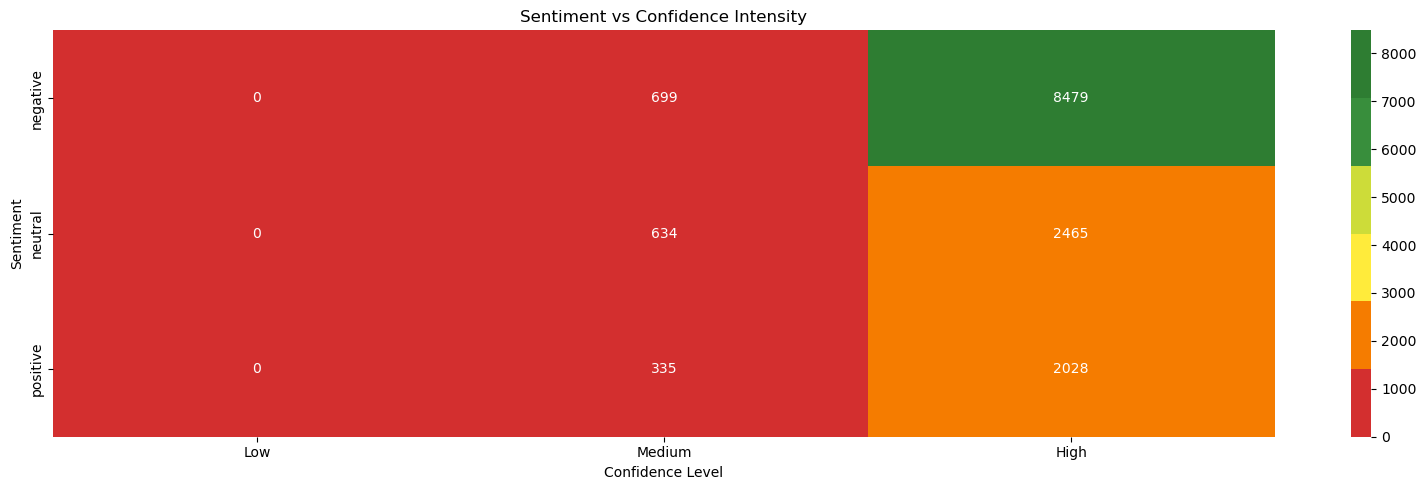

In [208]:
# Definindo os níveis de intensidade de confiança
bins = [0, 0.33, 0.66, 1]
labels = ["Low", "Medium", "High"]
df["confidence_level"] = pd.cut(df["airline_sentiment_confidence"], bins=bins, labels=labels)

# Criando a tabela cruzada
heatmap_data = df.pivot_table(
    values="airline_sentiment_confidence", 
    index="airline_sentiment", 
    columns="confidence_level", 
    aggfunc="count",
    fill_value=0
)

# Criando um mapa de cores personalizado
cmap = sns.color_palette([
    "#d32f2f",  
    "#f57c00",  
    "#ffeb3b",  
    "#cddc39",  
    "#388e3c",  
    "#2e7d32"   
])

# Plotando o heatmap
plt.figure(figsize=(16, 5))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap=cmap, cbar=True)

# Títulos e rótulos
plt.title("Sentiment vs Confidence Intensity")
plt.xlabel("Confidence Level")
plt.ylabel("Sentiment")

# Ajustando layout
plt.tight_layout()
plt.show()

In [209]:
df.tail(1)

tweet_id airline_sentiment  airline_sentiment_confidence  \
14639  569587140490866689           neutral                        0.6771   

      negativereason  negativereason_confidence   airline  \
14639            NaN                        0.0  American   

      airline_sentiment_gold       name negativereason_gold  retweet_count  \
14639                    NaN  daviddtwu                 NaN              0   

                                                    text tweet_coord  \
14639  @AmericanAir we have 8 ppl so we need 2 know h...         NaN   

      tweet_created tweet_location user_timezone confidence_level  
14639    2015-02-22     dallas, TX           NaN             High

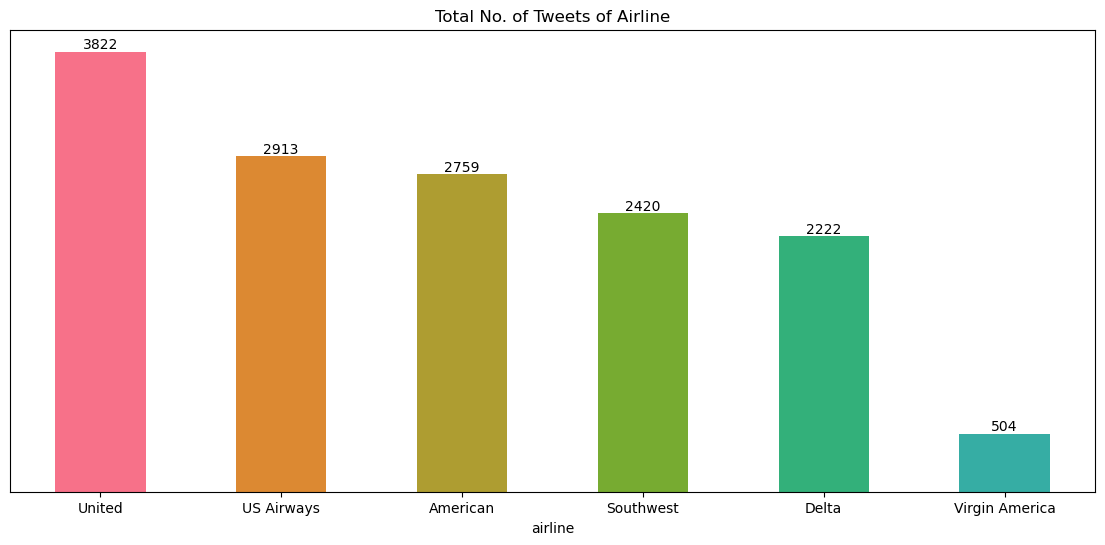

In [210]:
# Definindo a paleta de cores
colors = sns.color_palette('husl', 10)

# Criando o gráfico de barras
ax = pd.Series(df['airline']).value_counts().plot(
    kind="bar", 
    color=colors, 
    figsize=(14, 6), 
    fontsize=10, 
    rot=0, 
    title='Total No. of Tweets of Airline'
)

# Adicionando rótulos de dados nas barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        fontsize=10, 
        color='black', 
        xytext=(0, 5),  # Ajuste a posição dos rótulos
        textcoords='offset points'
    )

# Removendo o eixo Y
ax.get_yaxis().set_visible(False)

# Exibindo o gráfico
plt.show()

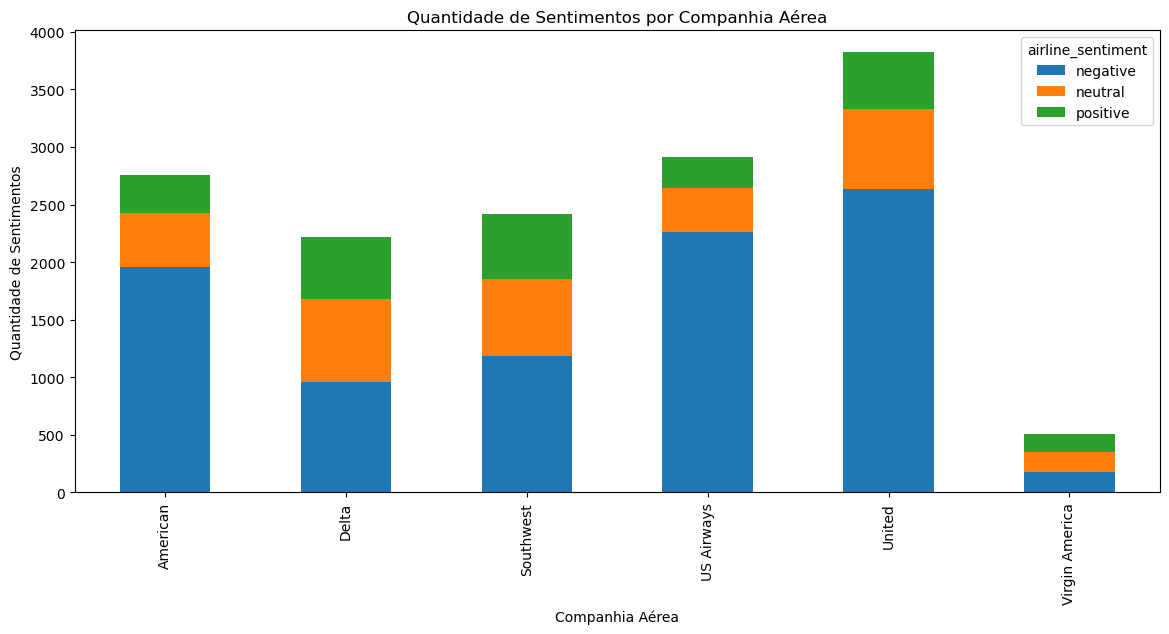

In [211]:
# Agrupando por companhia aérea e sentimento, e contando a quantidade de cada combinação
sentimentos_por_companhia = df.groupby(['airline', 'airline_sentiment']).size().unstack()

# Criando o gráfico de barras
sentimentos_por_companhia.plot(kind="bar", stacked=True, figsize=(14, 6), fontsize=10, title="Quantidade de Sentimentos por Companhia Aérea")

# Ajustando os rótulos
plt.xlabel('Companhia Aérea', fontsize=10)
plt.ylabel('Quantidade de Sentimentos', fontsize=10)

# Exibindo o gráfico
plt.show()

# Positivos

In [212]:
# Remove URLs do texto
def tira_url(text):
    """
    Remove URLs do texto utilizando uma expressão regular para identificar
    padrões de URLs começando com http, https ou www.
    
    Parâmetros:
    text (str): O texto do qual as URLs serão removidas.
    
    Retorna:
    str: O texto sem URLs.
    """
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


# Remove mencões de usuários (@username) do texto
def tira_username(text):
    """
    Remove mencões de usuários (palavras começando com '@') do texto utilizando
    uma expressão regular.
    
    Parâmetros:
    text (str): O texto do qual as mencões serão removidas.
    
    Retorna:
    str: O texto sem mencões de usuários.
    """
    return re.sub('@[^\s]+', '', text)


# Remove emojis do texto
def tira_emoji(text):
    """
    Remove emojis do texto utilizando uma expressão regular que captura
    todos os emojis Unicode conhecidos e os substitui por uma string vazia.
    
    Parâmetros:
    text (str): O texto do qual os emojis serão removidos.
    
    Retorna:
    str: O texto sem emojis.
    """
    emoji_pattern = re.compile("[" 
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
                               u"\U0001F680-\U0001F6FF"  # símbolos de transporte e mapas
                               u"\U0001F1E0-\U0001F1FF"  # bandeiras (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Separa palavras alfanuméricas e números no texto
def sepera_alphanumerico(text):
    """
    Separa as palavras alfanuméricas e números no texto, removendo caracteres especiais.
    
    Parâmetros:
    text (str): O texto que será processado.
    
    Retorna:
    str: O texto com palavras e números separados, sem caracteres especiais.
    """
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)  # Encontra palavras e números
    return " ".join(words)

# Remove caracteres não alfabéticos, mantendo apenas letras
def remover_caracter(text):
    """
    Remove caracteres que não são letras (A-Z, a-z) do texto.
    
    Parâmetros:
    text (str): O texto a ser processado.
    
    Retorna:
    str: O texto com apenas caracteres alfabéticos.
    """
    substitute = re.sub(r'[^a-zA-Z]', ' ', text)  # Substitui caracteres não alfabéticos por espaços
    return substitute


# Combina a razão negativa com o texto do tweet, caso exista
df['texto_final'] = df['negativereason'].fillna('') + ' ' + df['text'] 

# Aplica as funções de pré-processamento nos tweets
df['texto_final'] = df['texto_final'].apply(lambda x: tira_username(x))  # Remove @usuário
df['texto_final'] = df['texto_final'].apply(lambda x: tira_url(x))  # Remove URLs
df['texto_final'] = df['texto_final'].apply(lambda x: tira_emoji(x))  # Remove emojis
df['texto_final'] = df['texto_final'].apply(lambda x: sepera_alphanumerico(x))  # Separa alfanumérico
df['texto_final'] = df['texto_final'].apply(lambda x: remover_caracter(x))  # Remove caracteres não alfabéticos
df['texto_final'] = df['texto_final'].apply(lambda x: x.lower())  # Converte o texto para minúsculo

In [213]:
df['texto_final']

0                                                what said
1        plus you ve added commercials to the experienc...
2        i didn t today must mean i need to take anothe...
3        bad flight it s really aggressive to blast obn...
4        can t tell and it s a really big bad thing abo...
                               ...                        
14635    thank you we got on a different flight to chicago
14636    customer service issue leaving over    minutes...
14637      please bring american airlines to blackberry   
14638    customer service issue you have my money you c...
14639    we have   ppl so we need   know how many seats...
Name: texto_final, Length: 14640, dtype: object

In [215]:
# Filtra as linhas do DataFrame onde o sentimento da companhia aérea é 'positive' e armazena o texto das avaliações
positive = df[df['airline_sentiment'] == 'positive'].texto_final

# Filtra as linhas do DataFrame onde o sentimento da companhia aérea é 'neutral' e armazena o texto das avaliações
neutral = df[df['airline_sentiment'] == 'neutral'].texto_final

# Filtra as linhas do DataFrame onde o sentimento da companhia aérea é 'negative' e armazena o texto das avaliações
negative = df[df['airline_sentiment'] == 'negative'].texto_final

# Negativo

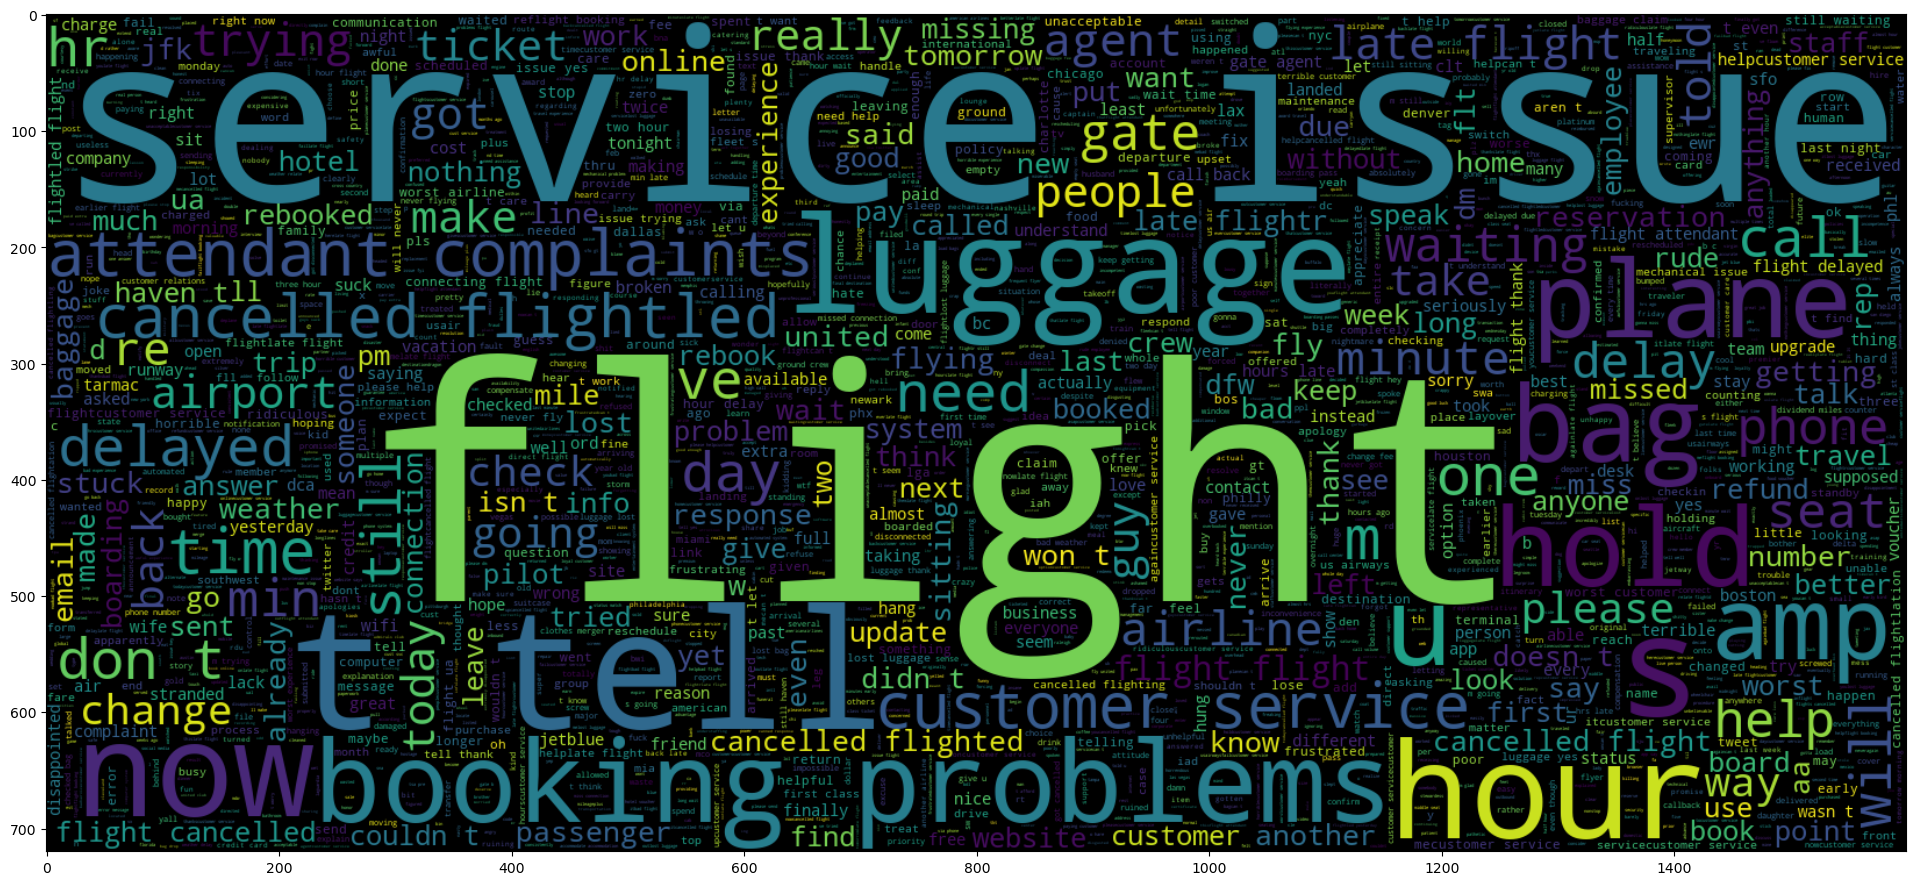

In [216]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(negative))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

# Neutro

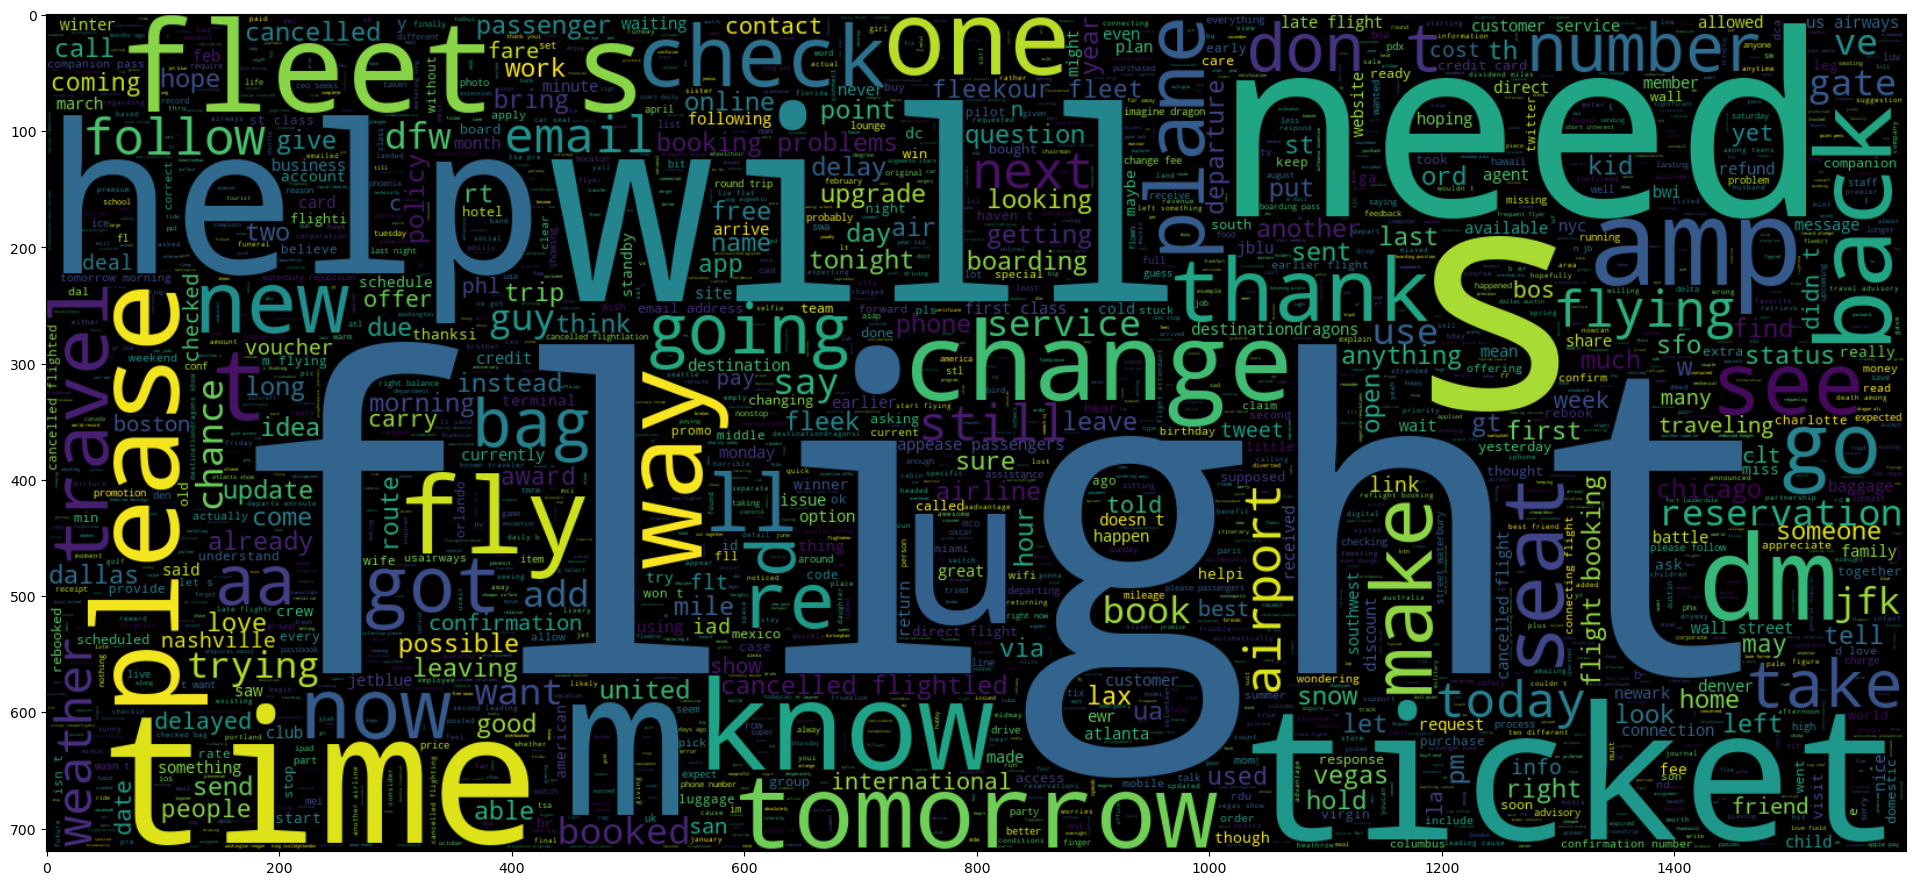

In [217]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(neutral))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

# Positivo

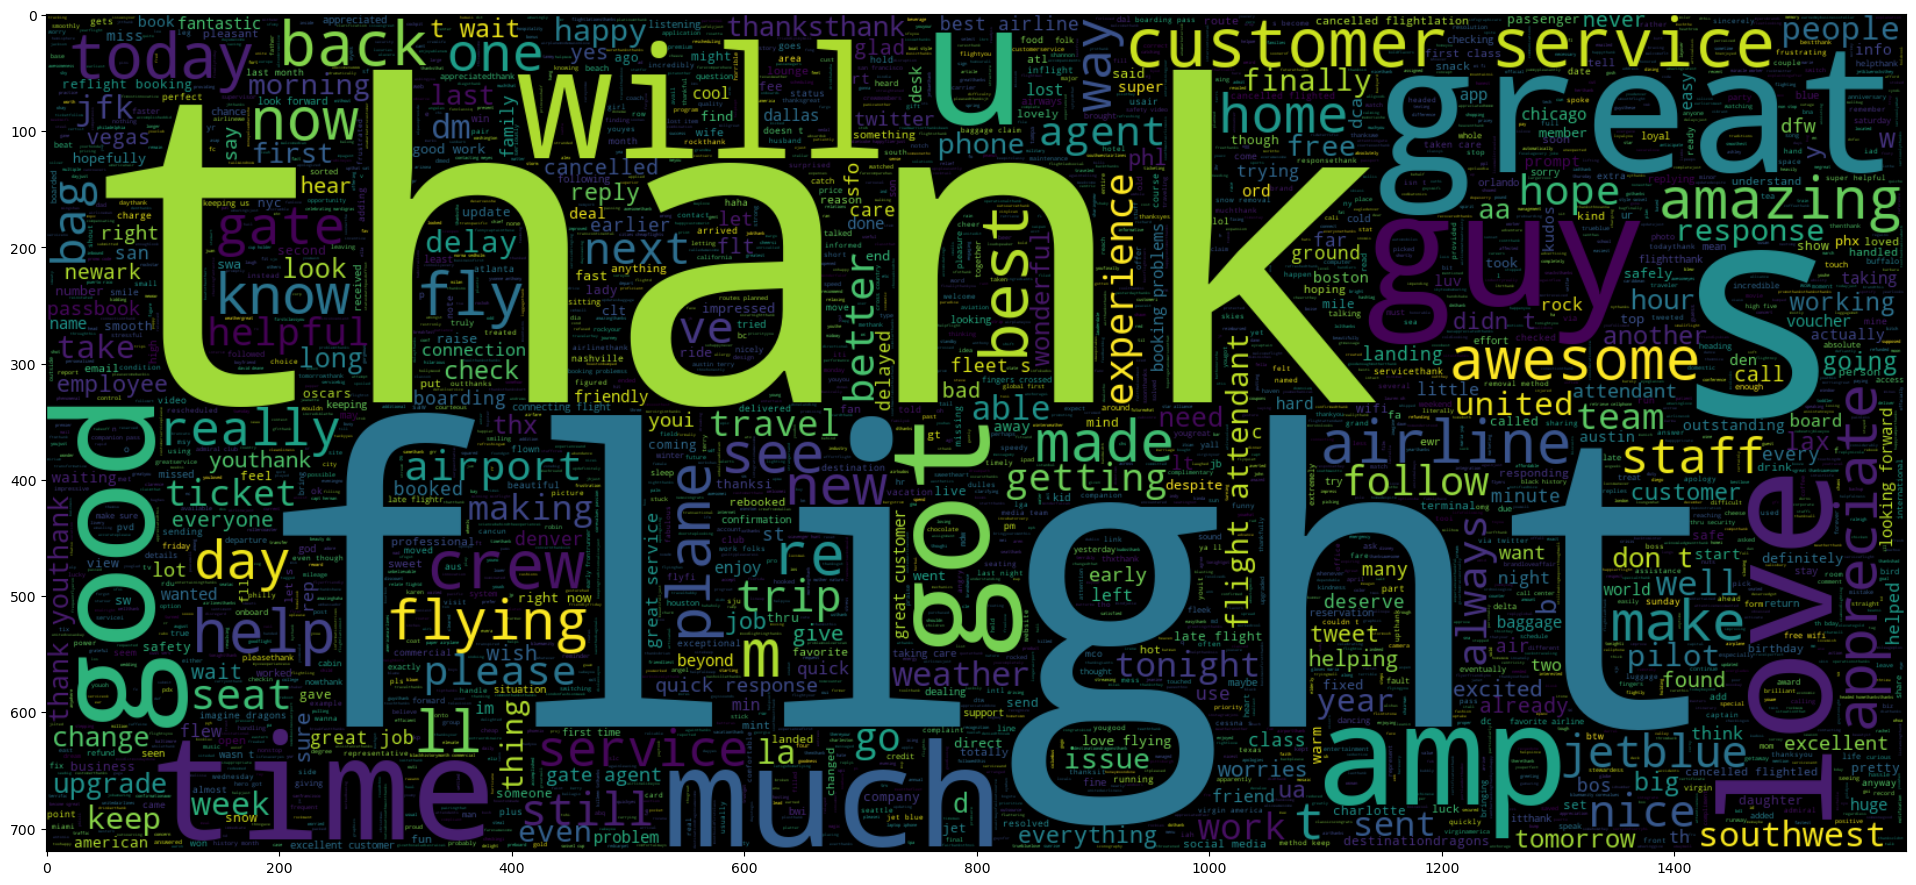

In [218]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

### Próximos Passos

1. **Separação dos Dados**  
   - Vamos dividir os dados em **conjunto de treino** e **conjunto de teste**. O conjunto de treino será utilizado para treinar os modelos e o conjunto de teste servirá para avaliar a performance dos modelos.

2. **Aplicação de Modelos**  
   - Treinaremos diferentes modelos, como **Random Forest**, **XGBoost**, **SVM**, **Naive Bayes**, entre outros, utilizando o conjunto de treino.

3. **Avaliação da Acurácia**  
   - Após treinar os modelos, calcularemos a **acurácia** de cada um utilizando a função accuracy_score(), comparando as previsões com os valores reais do conjunto de teste.

4. **Escolha do Melhor Modelo**  
   - Compararemos os resultados de acurácia e escolheremos o modelo que apresentar a melhor performance para seguir com o desenvolvimento.
